In [1]:
#= using Pkg

Pkg.add("DataFramesMeta")
Pkg.add("GLM")
 =#
using DataFramesMeta
using CSV
using DataFrames
using GLM
using Statistics
using Plots

# Lectura del archivo de datos con formato CSV y generación del DataFrame
file_path = "../dat/bottle.csv"
data = CSV.read(file_path, DataFrame)





864863×74 DataFrame
    Row │ Cst_Cnt  Btl_Cnt  Sta_ID       Depth_ID                           De ⋯
        │ Int64    Int64    String15     String                             In ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │       1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
      2 │       1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      3 │       1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      4 │       1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      5 │       1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
      6 │       1        6  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      7 │       1        7  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      8 │       1        8  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
   ⋮    │    ⋮        ⋮          ⋮                       ⋮                     ⋱
 864857 │   34403   864857  093.3 120.0  20-1611SR-MX-313-2053-09331200-0…     ⋯
 864858 │   34403   864858  093.3 120.0  20-1611SR-MX-313-2053-09331200-0…
 864859 │   34404   864859  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864860 │   34404   864860  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864861 │   34404   864861  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…     ⋯
 864862 │   34404   864862  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864863 │   34404   864863  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
                                              70 columns and 864848 rows omitted

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

T_degC ~ 1 + Cst_Cnt + Btl_Cnt + Depthm + RecInd + R_Depth + R_PRES

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error        t  Pr(>|t|)     Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)  14.5818       0.0112317   1298.28    <1e-99  14.5598       14.6038
Cst_Cnt      -0.000111414  7.69057e-6   -14.49    <1e-46  -0.000126487  -9.63405e-5
Btl_Cnt       3.62432e-6   3.15467e-7    11.49    <1e-29   3.00601e-6    4.24262e-6
Depthm       -2.7152       0.121539     -22.34    <1e-99  -2.95341      -2.47699
RecInd       -0.00288391   0.00152971    -1.89    0.0594  -0.0058821     0.000114274
R_Depth       1.21188      0.121604       9.97    <1e-2

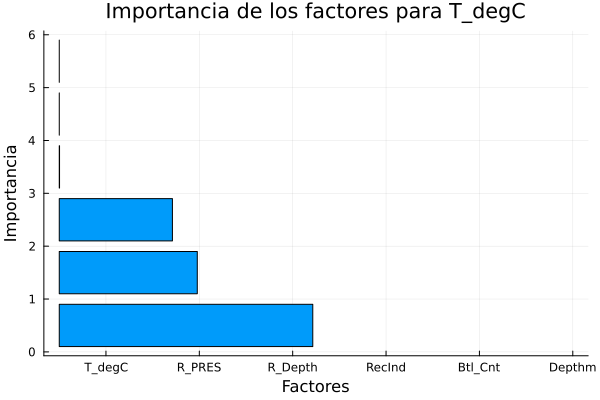

In [2]:
# Se asegura que todas las columnas convalores missing son limpiados:

# Remplazo de nothing con missing
transform!(data, names(data) .=> ByRow(x -> x === nothing ? missing : x))

# Eliminación de filas con valores faltantes en T_degC y columnas numericas
data_clean = dropmissing(data, [:T_degC])


# Filtrado de columnas numericas
numerical_cols = filter(c -> eltype(data_clean[!, c]) <: Number, names(data_clean))


# Subconjunto de datos numericos
data_numeric = data_clean[:, numerical_cols]

#describe(data)
#describe(data_numeric)

# Construcción de la formula: T_degC ~ de todas las demás columnas numéricas
formula = @formula(T_degC ~ Cst_Cnt + Btl_Cnt + Depthm + RecInd + R_Depth + R_PRES) 

model = lm(formula, data_numeric)

println(model)


println(" Los coeficientes indican la contribución de cada característica para predecir T_degC")
println(" Valores absolutos mayores implican mayor importancia.")

println(coef(model))

# R²: Bondad de ajuste
r_squared = r2(model)
println("R^2 es una metrica que mide que tan bien un modelo de regresión lineal")
println("ajusta los datos:", r_squared)

# Clasificación de las características por la magnitud absoluta de sus coeficientes

# Extracción de coeficientes
coefficients = coef(model)[2:end]

# Clasificación de características por importancia
importance = sort(collect(zip(numerical_cols[2:end], abs.(coefficients))), by=x->x[2], rev=true)

# Impresión de factores más importantes
for (factor, value) in importance
    println("Factor: $factor, Importancia: $value")
end


# Graficación de características importantes

# Preparación de datos para impresión
factors = [factor for (factor, _) in importance]
importance_values = [value for (_, value) in importance]

# Graficación de barra
bar(factors, importance_values, xlabel="Factores", ylabel="Importancia", title="Importancia de los factores para T_degC", legend=false, xticks=:auto, orientation=:horizontal)


